# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

## Feature Engineering Approach
--

### Aggregation by groups / events
- **One-shot aggregation by group:** For each group, we aggregate all their events in order to have a general view of the group. Churn prediction is a good example, as we want to know whether or not the customer will stop using the product, based on their historical activities.

![one-shot](https://miro.medium.com/max/1664/1*LhxmulumaCDQxXNXoYD0Iw.png)

- Sequential aggregation by event: For each group, we aggregate features sequentially by event. One example use case is fraud detection, where we need to analyze the user’s behavior transaction by transaction.

![seq](https://miro.medium.com/max/861/1*U5jTAltMXjs7rKZpcU6KuQ.png)

[Source](https://medium.com/data-from-the-trenches/automatic-feature-engineering-an-event-driven-approach-b2ca09d166f)

--

### Indicator variables

- Indicator variable from thresholds: Let’s say you’re studying alcohol preferences by U.S. consumers and your dataset has an age feature. You can create an indicator variable for age >= 21 to distinguish subjects who were over the legal drinking age.

- Indicator variable for special events: You’re modeling weekly sales for an e-commerce site. You can create two indicator variables for the weeks of Black Friday and Christmas.

- Indicator variable for groups of classes: You’re analyzing website conversions and your dataset has the categorical feature traffic_source. You could create an indicator variable for paid_traffic by flagging observations with traffic source values of  "Facebook Ads" or "Google Adwords".

### Interaction Features

- Sum of two features: Let’s say you wish to predict revenue based on preliminary sales data. You have the features sales_blue_pens and sales_black_pens. You could sum those features if you only care about overall sales_pens.

- Quotient of two features: You have a dataset of marketing campaigns with the features n_clicks and n_impressions. You can divide clicks by impressions to create  click_through_rate, allowing you to compare across campaigns of different volume.

- Product of two features: You’re running a pricing test, and you have the feature price and an indicator variable conversion. You can take their product to create the feature earnings.

### Feature Representation

- Creating dummy variables: Depending on your machine learning implementation, you may need to manually transform categorical features into dummy variables. You should always do this after grouping sparse classes.

- Date and time features: Let’s say you have the feature purchase_datetime. It might be more useful to extract purchase_day_of_week and purchase_hour_of_day. You can also aggregate observations to create features such as purchases_over_last_30_days.

[Source](https://elitedatascience.com/feature-engineering-best-practices)

--



ML Workflow: https://elitedatascience.com/birds-eye-view

In [2]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)

In [ ]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [4]:
# convert int to date
# getting the year and month for further analysis
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile['became_member_year'] = pd.DatetimeIndex(profile['became_member_on']).year

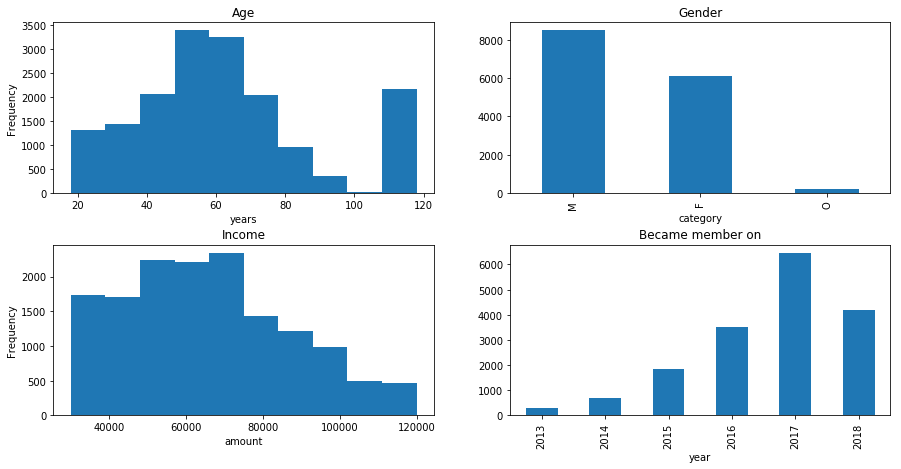

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15,7))

profile['age'].plot(kind='hist', ax=axes[0, 0], title='Age').set_xlabel('years')
profile['gender'].value_counts().plot(kind='bar', ax=axes[0, 1], title='Gender').set_xlabel('category')
profile['income'].plot(kind='hist', ax=axes[1, 0], title='Income').set_xlabel('amount')
profile['became_member_year'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1], title='Became member on').set_xlabel('year')

plt.subplots_adjust(hspace = 0.3, bottom=0.1)
plt.show()

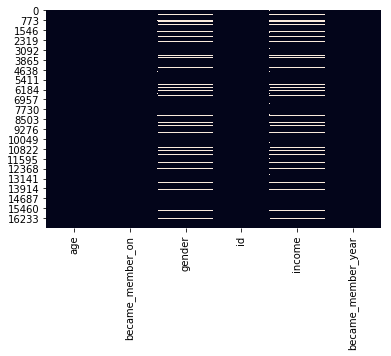

In [6]:
# visualizing missing values per column
sns.heatmap(profile.isnull(), cbar=False)

In [7]:
def calc_missing(df, col):
    """ calcuation of percentage of missing values
        if percentage is less than 5% drop the missing values otherwise not
    """
    return int((df[col].isnull().sum() / pd.value_counts(df[col]).sum())  * 100)

In [8]:
calc_missing(profile, 'gender')

14

In [9]:
# filling the missing values with N for None
profile['gender'] = profile['gender'].fillna('N')

In [10]:
calc_missing(profile, 'income')

14

In [11]:
# filling the missing values with the median, median was choosen becase there are some outliers in the dataset
profile['income'] = profile['income'].fillna(profile['income'].median())

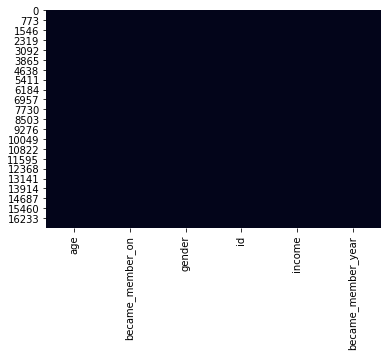

In [12]:
sns.heatmap(profile.isnull(), cbar=False)

In [13]:
# checking the age column
# age is filled with a value outside of the normal age to group the missing values together
profile.loc[profile['age'] == 118, :].shape

(2175, 6)

In [14]:
# grouping ages into groups to combine them into categories
# binning of age -> transform into descrete groups
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 120]
group_names = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', 'Missing']
profile['age_categories'] = pd.cut(profile['age'], bins, labels=group_names)

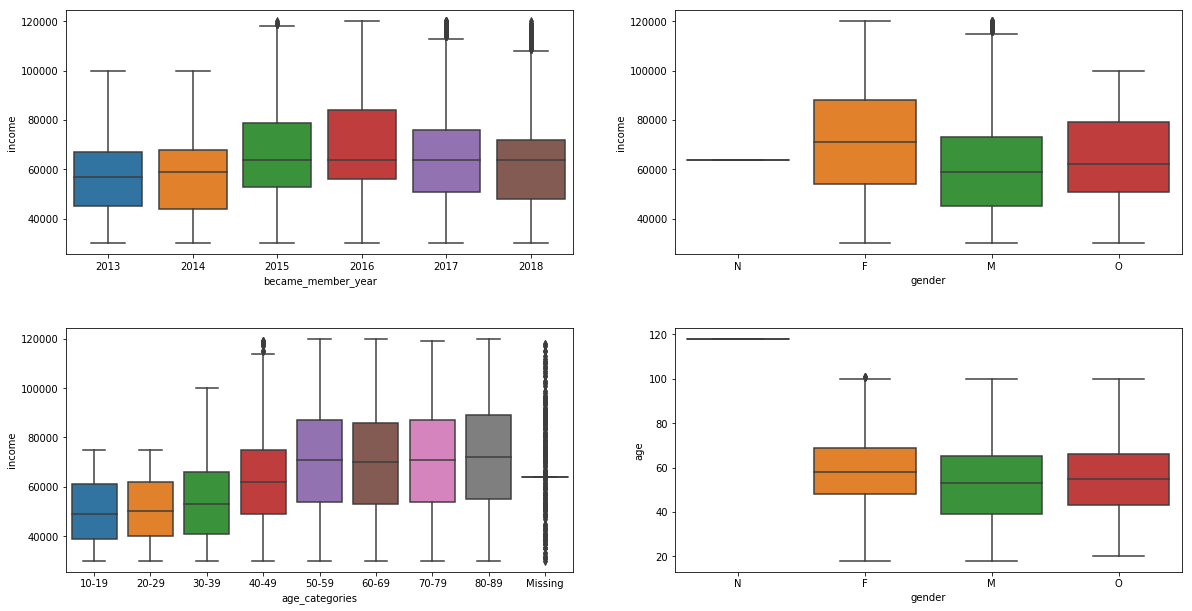

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.boxplot(data=profile, x='became_member_year', y='income', ax=axes[0, 0])
sns.boxplot(data=profile, x='gender', y='income', ax=axes[0, 1])
sns.boxplot(data=profile, x='age_categories', y='income', ax=axes[1, 0])
sns.boxplot(data=profile, x='gender', y='age', ax=axes[1, 1])
plt.subplots_adjust(hspace = 0.3, bottom=0.1)

In [16]:
profile.shape
profile.columns

Index(['age', 'became_member_on', 'gender', 'id', 'income',
       'became_member_year', 'age_categories'],
      dtype='object')

In [17]:
# combining portfolio and transcript
portfolio.head(10)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [18]:
# transforming an array into a set of dummy variables features
dummies = pd.get_dummies(portfolio['channels'].apply(pd.Series).stack(), prefix='channel').sum(level=0)

In [19]:
portfolio = portfolio.merge(dummies, left_index=True, right_index=True)

In [20]:
portfolio = portfolio.drop('channels', axis=1)

In [21]:
portfolio.head(10)

,difficulty,duration,id,offer_type,reward,channel_email,channel_mobile,channel_social,channel_web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1


In [22]:
transcript.head(5)

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [23]:
# getting the values out of a dict object
# combining both offer id and offer_id into a single column
values_df = pd.DataFrame(transcript['value'].tolist())
values_df['offerid'] = values_df['offer id'].combine_first(values_df['offer_id'])
values_df.drop(['offer id', 'offer_id'], axis=1, inplace=True)
index_df = pd.DataFrame({'idx': transcript.index.values.tolist()})
combined = index_df.merge(values_df, left_index=True, right_index=True)
combined_index = combined.set_index('idx')

In [24]:
transcript = transcript.merge(combined_index, left_index=True, right_index=True)

In [25]:
transcript.head(5)

,event,person,time,value,amount,reward,offerid
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0


In [26]:
transcript = transcript.merge(portfolio, left_on='offerid', right_on='id', how='left')
transcript = transcript.rename(columns={'reward_x': 'reward_paid', 'reward_y': 'reward_planned', 'offerid': 'offer_id'})

In [27]:
transcript.head(5)

,event,person,time,value,amount,reward_paid,offer_id,difficulty,duration,id,offer_type,reward_planned,channel_email,channel_mobile,channel_social,channel_web
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,7.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5.0,1.0,1.0,0.0,1.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,20.0,10.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5.0,1.0,0.0,0.0,1.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},NaN,NaN,2906b810c7d4411798c6938adc9daaa5,10.0,7.0,2906b810c7d4411798c6938adc9daaa5,discount,2.0,1.0,1.0,0.0,1.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4,10.0,10.0,fafdcd668e3743c1bb461111dcafc2a4,discount,2.0,1.0,1.0,1.0,1.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,5.0,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10.0,1.0,1.0,1.0,1.0


In [28]:
transcript['amount'] = transcript['amount'].fillna(0)
transcript = pd.get_dummies(transcript, columns=['event', 'offer_type'], prefix=None)

In [29]:
transcript = transcript.rename(columns={
    'event_offer completed': 'event_offer_completed',
    'event_offer received': 'event_offer_received',
    'event_offer viewed': 'event_offer_viewed'
})

In [30]:
transcript.head(5)

,person,time,value,amount,reward_paid,offer_id,difficulty,duration,id,reward_planned,channel_email,channel_mobile,channel_social,channel_web,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,offer_type_bogo,offer_type_discount,offer_type_informational
0,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,7.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,1.0,1.0,0.0,1.0,0,1,0,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,20.0,10.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,5.0,1.0,0.0,0.0,1.0,0,1,0,0,0,1,0
2,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,NaN,2906b810c7d4411798c6938adc9daaa5,10.0,7.0,2906b810c7d4411798c6938adc9daaa5,2.0,1.0,1.0,0.0,1.0,0,1,0,0,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0.0,NaN,fafdcd668e3743c1bb461111dcafc2a4,10.0,10.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,1.0,1.0,1.0,1.0,0,1,0,0,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0.0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,5.0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,1.0,1.0,1.0,1.0,0,1,0,0,1,0,0


In [31]:
transcript = transcript.drop(['value', 'id'], axis=1)

In [32]:
transcript.head(5)

,person,time,amount,reward_paid,offer_id,difficulty,duration,reward_planned,channel_email,channel_mobile,channel_social,channel_web,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,offer_type_bogo,offer_type_discount,offer_type_informational
0,78afa995795e4d85b5d9ceeca43f5fef,0,0.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,7.0,5.0,1.0,1.0,0.0,1.0,0,1,0,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,0.0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,20.0,10.0,5.0,1.0,0.0,0.0,1.0,0,1,0,0,0,1,0
2,e2127556f4f64592b11af22de27a7932,0,0.0,NaN,2906b810c7d4411798c6938adc9daaa5,10.0,7.0,2.0,1.0,1.0,0.0,1.0,0,1,0,0,0,1,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0.0,NaN,fafdcd668e3743c1bb461111dcafc2a4,10.0,10.0,2.0,1.0,1.0,1.0,1.0,0,1,0,0,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,0,0.0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,5.0,10.0,1.0,1.0,1.0,1.0,0,1,0,0,1,0,0


In [33]:
# adding general aggregated metrics
transcript['total_amount'] = transcript.groupby(['person'], as_index=False)['amount'].transform(np.sum).round()
transcript['total_transactions'] = transcript.groupby(['person'], as_index=False)['event_transaction'].transform(np.sum)
transcript['total_offers_received'] = transcript.groupby(['person'], as_index=False)['event_offer_received'].transform(np.sum)
transcript['total_offers_viewed'] = transcript.groupby(['person'], as_index=False)['event_offer_viewed'].transform(np.sum)
transcript['total_offers_completed'] = transcript.groupby(['person'], as_index=False)['event_offer_completed'].transform(np.sum)
transcript['total_offers_bogo'] = transcript.loc[transcript['event_offer_received'] == 1, :].groupby(['person'], as_index=False)['offer_type_bogo'].transform(np.sum)
transcript['total_offers_discount'] = transcript.loc[transcript['event_offer_received'] == 1, :].groupby(['person'], as_index=False)['offer_type_discount'].transform(np.sum)
transcript['total_offers_informational'] = transcript.loc[transcript['event_offer_received'] == 1, :].groupby(['person'], as_index=False)['offer_type_informational'].transform(np.sum)

# filling nans for each person with the first found values in the series groupby('person')
transcript['total_offers_bogo'] = transcript.groupby(['person'], as_index=False)['total_offers_bogo'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)
transcript['total_offers_discount'] = transcript.groupby(['person'], as_index=False)['total_offers_discount'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)
transcript['total_offers_informational'] = transcript.groupby(['person'], as_index=False)['total_offers_informational'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)

In [34]:
# adding offers that did convert the person
transcript['converted_bogo'] = transcript.loc[transcript['event_offer_completed'] == 1, :].groupby(['person'], as_index=False)['offer_type_bogo'].transform(np.sum)
transcript['converted_discount'] = transcript.loc[transcript['event_offer_completed'] == 1, :].groupby(['person'], as_index=False)['offer_type_discount'].transform(np.sum)
transcript['converted_informational'] = transcript.loc[transcript['event_offer_completed'] == 1, :].groupby(['person'], as_index=False)['offer_type_informational'].transform(np.sum)

# filling nans for each person with the first found values in the series groupby('person')
transcript['converted_bogo'] = transcript.groupby(['person'], as_index=False)['converted_bogo'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)
transcript['converted_discount'] = transcript.groupby(['person'], as_index=False)['converted_discount'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)
transcript['converted_informational'] = transcript.groupby(['person'], as_index=False)['converted_informational'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)

In [35]:
transcript['reward_paid'] = transcript['reward_paid'].fillna(0)
transcript['reward_planned'] = transcript['reward_planned'].fillna(0)

In [36]:
# shows how many events did the users participated in
transcript['all_events_count'] = transcript.groupby(['person'], as_index=False)['time'].transform('count')

# difference in time between events on average
transcript['events_avg_time_diff'] = transcript.groupby(['person'], as_index=False)['time'].transform(lambda t: t.sort_values().diff().mean())

# getting the reward payouts per person
transcript['total_reward_payout'] = test = transcript.groupby(['person'], as_index=False)['reward_paid'].transform(np.sum)
transcript['total_planned_reward_payout'] = transcript.loc[transcript['event_offer_received'] == 1, :].groupby(['person'], as_index=False)['reward_planned'].transform(np.sum)
transcript['total_planned_reward_payout'] = transcript.groupby(['person'], as_index=False)['total_planned_reward_payout'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)

# getting the touchpoints which were part of the completed_offer
transcript['converted_email_touchpoints'] = transcript[transcript['event_offer_completed'] == 1].groupby(['person'], as_index=False)['channel_email'].transform(np.sum)
transcript['converted_mobile_touchpoints'] = transcript[transcript['event_offer_completed'] == 1].groupby(['person'], as_index=False)['channel_mobile'].transform(np.sum)
transcript['converted_social_touchpoints'] = transcript[transcript['event_offer_completed'] == 1].groupby(['person'], as_index=False)['channel_social'].transform(np.sum)
transcript['converted_web_touchpoints'] = transcript[transcript['event_offer_completed'] == 1].groupby(['person'], as_index=False)['channel_web'].transform(np.sum)

transcript['converted_email_touchpoints'] = transcript.groupby(['person'], as_index=False)['converted_email_touchpoints'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)
transcript['converted_mobile_touchpoints'] = transcript.groupby(['person'], as_index=False)['converted_email_touchpoints'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)
transcript['converted_social_touchpoints'] = transcript.groupby(['person'], as_index=False)['converted_social_touchpoints'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)
transcript['converted_web_touchpoints'] = transcript.groupby(['person'], as_index=False)['converted_web_touchpoints'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)

In [37]:
# Total average duration
transcript['total_average_duration'] = transcript[transcript['event_offer_received'] == 1].groupby(['person'], as_index=False)['duration'].transform(np.mean).round()
transcript['total_average_duration'] = transcript.groupby(['person'], as_index=False)['total_average_duration'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)

# Completed average duration
transcript['completed_average_duration'] = transcript[transcript['event_offer_completed'] == 1].groupby(['person'], as_index=False)['duration'].transform(np.mean).round()
transcript['completed_average_duration'] = transcript.groupby(['person'], as_index=False)['completed_average_duration'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)

# Total average difficulty
transcript['total_average_difficulty'] = transcript[transcript['event_offer_received'] == 1].groupby(['person'], as_index=False)['difficulty'].transform(np.mean).round()
transcript['total_average_difficulty'] = transcript.groupby(['person'], as_index=False)['total_average_difficulty'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)

# Completed average difficulty
transcript['completed_average_difficulty'] = transcript[transcript['event_offer_completed'] == 1].groupby(['person'], as_index=False)['difficulty'].transform(np.mean).round()
transcript['completed_average_difficulty'] = transcript.groupby(['person'], as_index=False)['completed_average_difficulty'].apply(lambda c: c.fillna(0) if c.fillna(0).sum() == 0 else c.fillna(method='ffill').fillna(method='bfill')).reset_index(level=0, drop=True)


In [38]:
agg_transcript_df = transcript.sort_values('person').drop_duplicates(subset='person', keep='first')

In [39]:
agg_transcript_df['total_amount'] = agg_transcript_df['total_amount'].round()

In [40]:
agg_transcript_df = agg_transcript_df.drop(columns=['time',    
                                                          'amount', 
                                                          'duration',
                                                          'reward_paid', 
                                                          'offer_id', 
                                                          'difficulty',
                                                          'reward_planned',
                                                          'channel_email',
                                                          'channel_mobile',
                                                          'channel_social',
                                                          'channel_web',
                                                          'event_offer_completed',
                                                          'event_offer_received',
                                                          'event_offer_viewed',
                                                          'event_transaction',
                                                          'offer_type_bogo',
                                                          'offer_type_discount',
                                                          'offer_type_informational'
                                                         ])

In [41]:
agg_transcript_df.loc[agg_transcript_df['person'] == '3579056d94644a9481e05012b48fe252', :].head(10)

,person,total_amount,total_transactions,total_offers_received,total_offers_viewed,total_offers_completed,total_offers_bogo,total_offers_discount,total_offers_informational,converted_bogo,converted_discount,converted_informational,all_events_count,events_avg_time_diff,total_reward_payout,total_planned_reward_payout,converted_email_touchpoints,converted_mobile_touchpoints,converted_social_touchpoints,converted_web_touchpoints,total_average_duration,completed_average_duration,total_average_difficulty,completed_average_difficulty
105295,3579056d94644a9481e05012b48fe252,81.0,20,4,3,4,2.0,2.0,0.0,2.0,2.0,0.0,31,23.0,14.0,14.0,4.0,4.0,1.0,4.0,8.0,8.0,8.0,8.0


In [42]:
agg_transcript_df.shape

(17000, 24)

In [43]:
merged_df = profile.merge(agg_transcript_df, how='inner', left_on='id', right_on='person')

In [44]:
merged_df.shape

(17000, 31)

In [45]:
merged_df.head(5)


,age,became_member_on,gender,id,income,became_member_year,age_categories,person,total_amount,total_transactions,total_offers_received,total_offers_viewed,total_offers_completed,total_offers_bogo,total_offers_discount,total_offers_informational,converted_bogo,converted_discount,converted_informational,all_events_count,events_avg_time_diff,total_reward_payout,total_planned_reward_payout,converted_email_touchpoints,converted_mobile_touchpoints,converted_social_touchpoints,converted_web_touchpoints,total_average_duration,completed_average_duration,total_average_difficulty,completed_average_difficulty
0,118,2017-02-12,N,68be06ca386d4c31939f3a4f0e3dd783,64000.0,2017,Missing,68be06ca386d4c31939f3a4f0e3dd783,20.0,9,5,5,2,0.0,5.0,0.0,0.0,2.0,0.0,21,26.400000,5.0,14.0,2.0,2.0,2.0,2.0,9.0,8.0,11.0,8.0
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,50-59,0610b486422d4921ae7d2bf64640c50b,77.0,3,2,0,1,1.0,0.0,1.0,1.0,0.0,0.0,6,102.000000,5.0,5.0,1.0,1.0,0.0,1.0,6.0,7.0,2.0,5.0
2,118,2018-07-12,N,38fe809add3b4fcf9315a9694bb96ff5,64000.0,2018,Missing,38fe809add3b4fcf9315a9694bb96ff5,14.0,6,2,2,0,1.0,0.0,1.0,0.0,0.0,0.0,10,62.666667,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,70-79,78afa995795e4d85b5d9ceeca43f5fef,159.0,7,4,4,3,3.0,0.0,1.0,3.0,0.0,0.0,18,34.235294,20.0,20.0,3.0,3.0,2.0,2.0,6.0,6.0,5.0,7.0
4,118,2017-08-04,N,a03223e636434f42ac4c3df47e8bac43,64000.0,2017,Missing,a03223e636434f42ac4c3df47e8bac43,5.0,3,5,3,0,0.0,3.0,2.0,0.0,0.0,0.0,11,62.400000,0.0,15.0,0.0,0.0,0.0,0.0,7.0,0.0,12.0,0.0


In [46]:
df = merged_df.copy()

In [47]:
df.head(10)

,age,became_member_on,gender,id,income,became_member_year,age_categories,person,total_amount,total_transactions,total_offers_received,total_offers_viewed,total_offers_completed,total_offers_bogo,total_offers_discount,total_offers_informational,converted_bogo,converted_discount,converted_informational,all_events_count,events_avg_time_diff,total_reward_payout,total_planned_reward_payout,converted_email_touchpoints,converted_mobile_touchpoints,converted_social_touchpoints,converted_web_touchpoints,total_average_duration,completed_average_duration,total_average_difficulty,completed_average_difficulty
0,118,2017-02-12,N,68be06ca386d4c31939f3a4f0e3dd783,64000.0,2017,Missing,68be06ca386d4c31939f3a4f0e3dd783,20.0,9,5,5,2,0.0,5.0,0.0,0.0,2.0,0.0,21,26.400000,5.0,14.0,2.0,2.0,2.0,2.0,9.0,8.0,11.0,8.0
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,50-59,0610b486422d4921ae7d2bf64640c50b,77.0,3,2,0,1,1.0,0.0,1.0,1.0,0.0,0.0,6,102.000000,5.0,5.0,1.0,1.0,0.0,1.0,6.0,7.0,2.0,5.0
2,118,2018-07-12,N,38fe809add3b4fcf9315a9694bb96ff5,64000.0,2018,Missing,38fe809add3b4fcf9315a9694bb96ff5,14.0,6,2,2,0,1.0,0.0,1.0,0.0,0.0,0.0,10,62.666667,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,70-79,78afa995795e4d85b5d9ceeca43f5fef,159.0,7,4,4,3,3.0,0.0,1.0,3.0,0.0,0.0,18,34.235294,20.0,20.0,3.0,3.0,2.0,2.0,6.0,6.0,5.0,7.0
4,118,2017-08-04,N,a03223e636434f42ac4c3df47e8bac43,64000.0,2017,Missing,a03223e636434f42ac4c3df47e8bac43,5.0,3,5,3,0,0.0,3.0,2.0,0.0,0.0,0.0,11,62.400000,0.0,15.0,0.0,0.0,0.0,0.0,7.0,0.0,12.0,0.0
5,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,2018,60-69,e2127556f4f64592b11af22de27a7932,58.0,3,4,3,2,1.0,2.0,1.0,1.0,1.0,0.0,12,47.454545,7.0,9.0,2.0,2.0,1.0,2.0,7.0,8.0,6.0,8.0
6,118,2017-09-25,N,8ec6ce2a7e7949b1bf142def7d0e0586,64000.0,2017,Missing,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,0,5,5,0,1.0,3.0,1.0,0.0,0.0,0.0,10,58.000000,0.0,16.0,0.0,0.0,0.0,0.0,7.0,0.0,8.0,0.0
7,118,2017-10-02,N,68617ca6246f4fbc85e91a2a49552598,64000.0,2017,Missing,68617ca6246f4fbc85e91a2a49552598,0.0,2,5,4,0,3.0,2.0,0.0,0.0,0.0,0.0,11,65.400000,0.0,30.0,0.0,0.0,0.0,0.0,7.0,0.0,8.0,0.0
8,65,2018-02-09,M,389bc3fa690240e798340f5a15918d5c,53000.0,2018,60-69,389bc3fa690240e798340f5a15918d5c,36.0,3,6,6,5,4.0,2.0,0.0,3.0,2.0,0.0,20,31.578947,19.0,24.0,5.0,5.0,3.0,5.0,7.0,7.0,7.0,7.0
9,118,2016-11-22,N,8974fc5686fe429db53ddde067b88302,64000.0,2016,Missing,8974fc5686fe429db53ddde067b88302,16.0,6,4,3,1,3.0,0.0,1.0,1.0,0.0,0.0,14,36.461538,5.0,20.0,1.0,1.0,0.0,1.0,5.0,7.0,5.0,5.0


In [53]:
# saving the preprocessed file
#df.to_csv('./data/aggregated.csv', index=False)

In [54]:
ag_df = pd.read_csv('./data/aggregated.csv')

In [55]:
ag_df.head(5)

,age,became_member_on,gender,id,income,became_member_year,age_categories,person,total_amount,total_transactions,total_offers_received,total_offers_viewed,total_offers_completed,total_offers_bogo,total_offers_discount,total_offers_informational,converted_bogo,converted_discount,converted_informational,all_events_count,events_avg_time_diff,total_reward_payout,total_planned_reward_payout,converted_email_touchpoints,converted_mobile_touchpoints,converted_social_touchpoints,converted_web_touchpoints,total_average_duration,completed_average_duration,total_average_difficulty,completed_average_difficulty
0,118,2017-02-12,N,68be06ca386d4c31939f3a4f0e3dd783,64000.0,2017,Missing,68be06ca386d4c31939f3a4f0e3dd783,20.0,9,5,5,2,0.0,5.0,0.0,0.0,2.0,0.0,21,26.400000,5.0,14.0,2.0,2.0,2.0,2.0,9.0,8.0,11.0,8.0
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,50-59,0610b486422d4921ae7d2bf64640c50b,77.0,3,2,0,1,1.0,0.0,1.0,1.0,0.0,0.0,6,102.000000,5.0,5.0,1.0,1.0,0.0,1.0,6.0,7.0,2.0,5.0
2,118,2018-07-12,N,38fe809add3b4fcf9315a9694bb96ff5,64000.0,2018,Missing,38fe809add3b4fcf9315a9694bb96ff5,14.0,6,2,2,0,1.0,0.0,1.0,0.0,0.0,0.0,10,62.666667,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,70-79,78afa995795e4d85b5d9ceeca43f5fef,159.0,7,4,4,3,3.0,0.0,1.0,3.0,0.0,0.0,18,34.235294,20.0,20.0,3.0,3.0,2.0,2.0,6.0,6.0,5.0,7.0
4,118,2017-08-04,N,a03223e636434f42ac4c3df47e8bac43,64000.0,2017,Missing,a03223e636434f42ac4c3df47e8bac43,5.0,3,5,3,0,0.0,3.0,2.0,0.0,0.0,0.0,11,62.400000,0.0,15.0,0.0,0.0,0.0,0.0,7.0,0.0,12.0,0.0


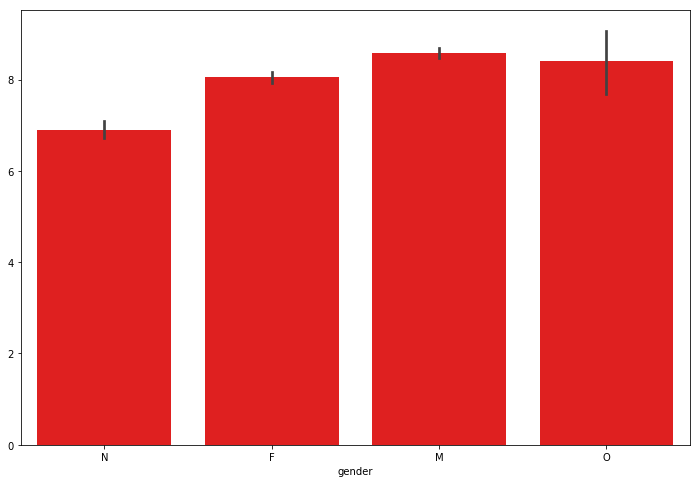

In [86]:
t_by_gender = ag_df.groupby(['gender'])['total_transactions'].mean()
count_by_gender = ag_df['gender'].value_counts()

In [87]:
t_by_gender

gender
F    8.057106
M    8.580151
N    6.894713
O    8.400943
Name: total_transactions, dtype: float64

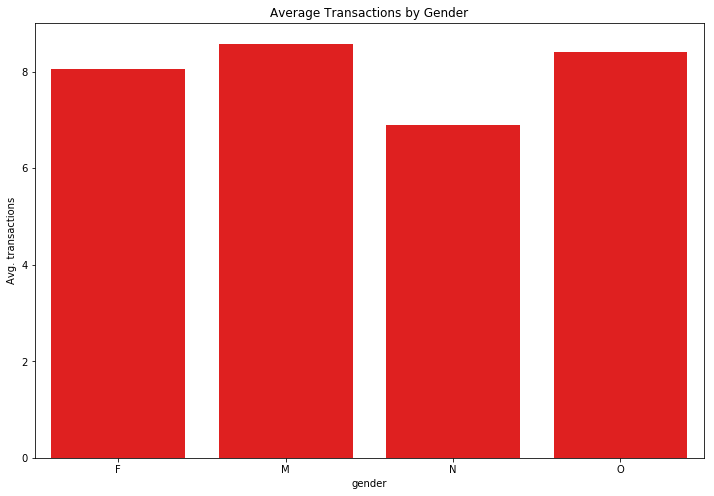

In [110]:
plt.figure(figsize=(12, 8))
sns.barplot(t_by_gender.index, t_by_gender.values, color='red')
plt.ylabel('Avg. transactions')
plt.title('Average Transactions by Gender')
plt.show()

In [92]:
offer_completed_gender = ag_df.groupby(['gender'])['total_offers_completed'].mean()

Text(0.5, 1.0, 'Average Offers Completed by Gender')

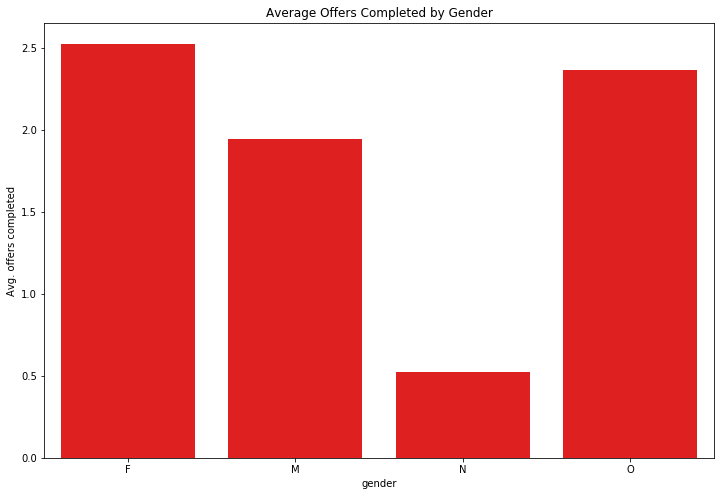

In [109]:
plt.figure(figsize=(12, 8))
sns.barplot(offer_completed_gender.index, offer_completed_gender.values, color='red')
plt.ylabel('Avg. offers completed')
plt.title('Average Offers Completed by Gender')

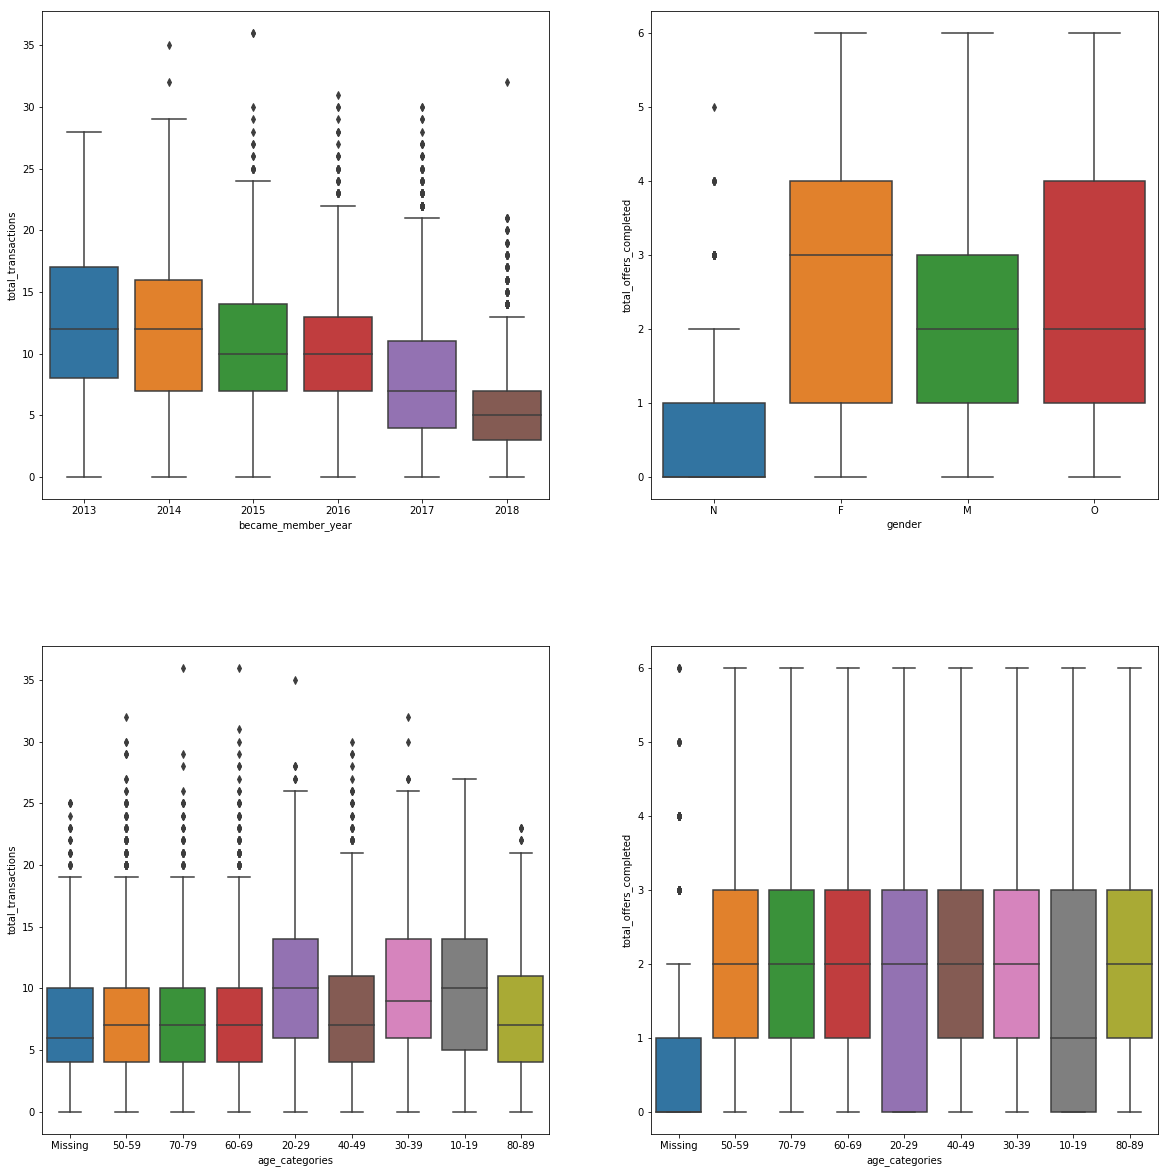

In [108]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
sns.boxplot(data=ag_df, x='became_member_year', y='total_transactions', ax=axes[0, 0])
sns.boxplot(data=ag_df, x='gender', y='total_offers_completed', ax=axes[0, 1])
sns.boxplot(data=ag_df, x='age_categories', y='total_transactions', ax=axes[1, 0])
sns.boxplot(data=ag_df, x='age_categories', y='total_offers_completed', ax=axes[1, 1])
plt.subplots_adjust(hspace = 0.3, bottom=0.1)

In [91]:
ag_df.columns

Index(['age', 'became_member_on', 'gender', 'id', 'income',
       'became_member_year', 'age_categories', 'person', 'total_amount',
       'total_transactions', 'total_offers_received', 'total_offers_viewed',
       'total_offers_completed', 'total_offers_bogo', 'total_offers_discount',
       'total_offers_informational', 'converted_bogo', 'converted_discount',
       'converted_informational', 'all_events_count', 'events_avg_time_diff',
       'total_reward_payout', 'total_planned_reward_payout',
       'converted_email_touchpoints', 'converted_mobile_touchpoints',
       'converted_social_touchpoints', 'converted_web_touchpoints',
       'total_average_duration', 'completed_average_duration',
       'total_average_difficulty', 'completed_average_difficulty'],
      dtype='object')

In [114]:
pd.value_counts(ag_df['income'])
ag_df['income'].describe()

count    17000.000000 
mean     65225.235294 
std      20174.747749 
min      30000.000000 
25%      51000.000000 
50%      64000.000000 
75%      76000.000000 
max      120000.000000
Name: income, dtype: float64

In [137]:
bins = [29999, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000]
labels = ['30k-39k', '40k-49k', '50k-59k', '60k-69k', '70k-79k', '80k-89k', '90k-99k', '100k-109k', '110k-120k']
ag_df['income_binned'] = pd.cut(ag_df['income'], bins=bins, labels=labels)

In [139]:
ag_df['income_binned'].value_counts()

60k-69k      4522
50k-59k      2659
70k-79k      2220
30k-39k      2135
40k-49k      1899
80k-89k      1371
90k-99k      1188
100k-109k    546 
110k-120k    460 
Name: income_binned, dtype: int64

In [173]:
ag_df.columns

Index(['age', 'became_member_on', 'gender', 'id', 'income',
       'became_member_year', 'age_categories', 'person', 'total_amount',
       'total_transactions', 'total_offers_received', 'total_offers_viewed',
       'total_offers_completed', 'total_offers_bogo', 'total_offers_discount',
       'total_offers_informational', 'converted_bogo', 'converted_discount',
       'converted_informational', 'all_events_count', 'events_avg_time_diff',
       'total_reward_payout', 'total_planned_reward_payout',
       'converted_email_touchpoints', 'converted_mobile_touchpoints',
       'converted_social_touchpoints', 'converted_web_touchpoints',
       'total_average_duration', 'completed_average_duration',
       'total_average_difficulty', 'completed_average_difficulty',
       'income_binned'],
      dtype='object')

In [184]:
#ag_df.to_csv('./data/aggregated-income.csv', index=False)

In [40]:
df = pd.read_csv('./data/aggregated-income.csv')

In [62]:
df = df.fillna(0, axis=1)

In [63]:
df.columns

Index(['age', 'became_member_on', 'gender', 'id', 'income',
       'became_member_year', 'age_categories', 'person', 'total_amount',
       'total_transactions', 'total_offers_received', 'total_offers_viewed',
       'total_offers_completed', 'total_offers_bogo', 'total_offers_discount',
       'total_offers_informational', 'converted_bogo', 'converted_discount',
       'converted_informational', 'all_events_count', 'events_avg_time_diff',
       'total_reward_payout', 'total_planned_reward_payout',
       'converted_email_touchpoints', 'converted_mobile_touchpoints',
       'converted_social_touchpoints', 'converted_web_touchpoints',
       'total_average_duration', 'completed_average_duration',
       'total_average_difficulty', 'completed_average_difficulty',
       'income_binned'],
      dtype='object')

In [64]:
cr_total = df['total_offers_completed'].sum() / df['total_offers_received'].sum()

In [65]:
cr_total

0.4402244451145168

In [66]:
cr_gender = df.groupby(['gender'])['total_offers_completed'].sum() / df.groupby(['gender'])['total_offers_received'].sum()

In [67]:
cr_gender

gender
F    0.563702
M    0.431850
N    0.116101
O    0.546943
dtype: float64

In [68]:
cr_income = df.groupby(['gender', 'income_binned'])['total_offers_completed'].sum() / df.groupby(['gender', 'income_binned'])['total_offers_received'].sum()

In [69]:
cr_income

gender  income_binned
F       100k-109k        0.624264
        110k-120k        0.615611
        30k-39k          0.445161
        40k-49k          0.476739
        50k-59k          0.553772
        60k-69k          0.552492
        70k-79k          0.583229
        80k-89k          0.634968
        90k-99k          0.605392
M       100k-109k        0.625850
        110k-120k        0.635374
        30k-39k          0.307110
        40k-49k          0.335808
        50k-59k          0.404464
        60k-69k          0.441159
        70k-79k          0.517772
        80k-89k          0.598560
        90k-99k          0.597535
N       60k-69k          0.116101
O       30k-39k          0.478571
        40k-49k          0.292135
        50k-59k          0.560185
        60k-69k          0.624161
        70k-79k          0.666667
        80k-89k          0.544715
        90k-99k          0.594937
dtype: float64

In [70]:
cr_ages = df.groupby(['gender', 'age_categories'])['total_offers_completed'].sum() / df.groupby(['gender', 'age_categories'])['total_offers_received'].sum()

In [71]:
cr_ages

gender  age_categories
F       10-19             0.447887
        20-29             0.513439
        30-39             0.541401
        40-49             0.551221
        50-59             0.577719
        60-69             0.583775
        70-79             0.555971
        80-89             0.590349
        Missing           0.554649
M       10-19             0.325132
        20-29             0.338530
        30-39             0.393159
        40-49             0.433364
        50-59             0.465159
        60-69             0.456771
        70-79             0.477624
        80-89             0.459801
        Missing           0.469657
N       Missing           0.116101
O       10-19             0.466667
        20-29             0.322034
        30-39             0.504505
        40-49             0.645161
        50-59             0.565056
        60-69             0.513158
        70-79             0.631068
        80-89             0.422222
        Missing           0.7142

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2fc32ccf8>,
      dtype=object)

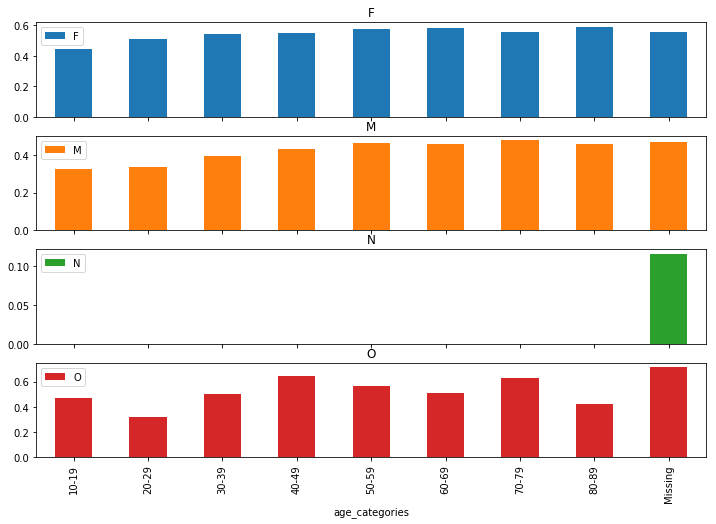

In [72]:
cr_ages.unstack(level=0).plot(kind='bar', subplots=True, figsize=(12,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2fc3793c8>,
      dtype=object)

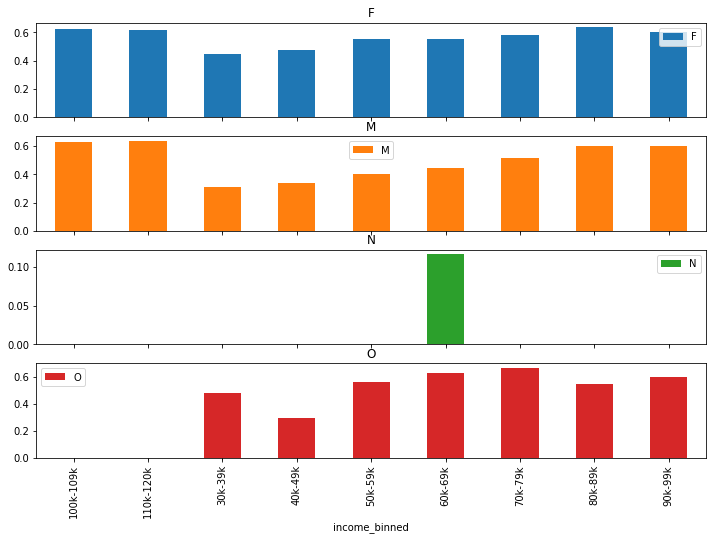

In [73]:
cr_income.unstack(level=0).sort_values('income_binned').plot(kind='bar', subplots=True, figsize=(12,8))

In [74]:
df.columns

Index(['age', 'became_member_on', 'gender', 'id', 'income',
       'became_member_year', 'age_categories', 'person', 'total_amount',
       'total_transactions', 'total_offers_received', 'total_offers_viewed',
       'total_offers_completed', 'total_offers_bogo', 'total_offers_discount',
       'total_offers_informational', 'converted_bogo', 'converted_discount',
       'converted_informational', 'all_events_count', 'events_avg_time_diff',
       'total_reward_payout', 'total_planned_reward_payout',
       'converted_email_touchpoints', 'converted_mobile_touchpoints',
       'converted_social_touchpoints', 'converted_web_touchpoints',
       'total_average_duration', 'completed_average_duration',
       'total_average_difficulty', 'completed_average_difficulty',
       'income_binned'],
      dtype='object')

In [196]:
cr_by_offer = pd.DataFrame()
cr_by_offer['bogo_conversion'] = (df.groupby(['gender'])['converted_bogo'].sum() / df.groupby(['gender'])['total_offers_bogo'].sum()).round(2)

In [197]:
cr_by_offer['discount_conversion'] = (df.groupby(['gender'])['converted_discount'].sum() / df.groupby(['gender'])['total_offers_discount'].sum()).round(2)

In [198]:
cr_by_offer['informal_conversion'] = (df.groupby(['gender'])['converted_informational'].sum() / df.groupby(['gender'])['total_offers_informational'].sum()).round(2)

In [288]:
cr_by_offer

,bogo_conversion,discount_conversion,informal_conversion
gender,,,
F,0.68,0.73,0.0
M,0.49,0.58,0.0
N,0.10,0.19,0.0
O,0.69,0.70,0.0


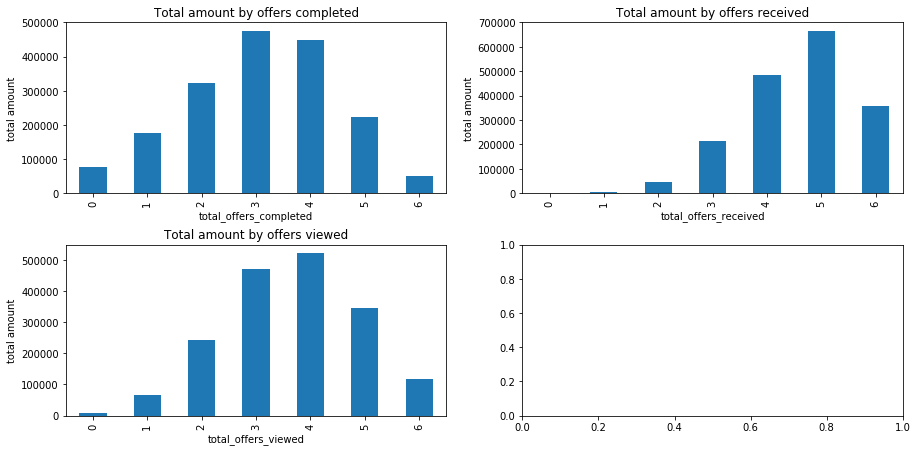

In [270]:
from numpy import median, mean
#sns.barplot(data=df, x='total_offers_completed', y='total_transactions')
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

df.groupby('total_offers_completed')['total_amount'].agg('sum').plot(kind='bar', ax=axes[0, 0], title='Total amount by offers completed').set_ylabel('total amount')
df.groupby('total_offers_received')['total_amount'].agg('sum').plot(kind='bar', ax=axes[0, 1], title='Total amount by offers received').set_ylabel('total amount')
df.groupby('total_offers_viewed')['total_amount'].agg('sum').plot(kind='bar', ax=axes[1, 0], title='Total amount by offers viewed').set_ylabel('total amount')


plt.subplots_adjust(hspace = 0.3, bottom=0.1)
plt.show()

In [280]:
offer_cr = df.groupby(['gender'])[['total_offers_received', 'total_offers_viewed', 'total_offers_completed']].sum()
offer_cr['offer_conversion_rate'] = offer_cr.apply(lambda x: x[2] / x[0], axis=1).round(2)
offer_cr['offer_view_cr'] = offer_cr.apply(lambda x: x[1] / x[0], axis=1).round(2)

In [281]:
offer_cr

,total_offers_received,total_offers_viewed,total_offers_completed,offer_conversion_rate,offer_view_cr
gender,,,,,
F,27456,20786,15477,0.56,0.76
M,38129,28301,16466,0.43,0.74
N,9776,7865,1135,0.12,0.80
O,916,773,501,0.55,0.84


Text(0, 0.5, 'view rate %')

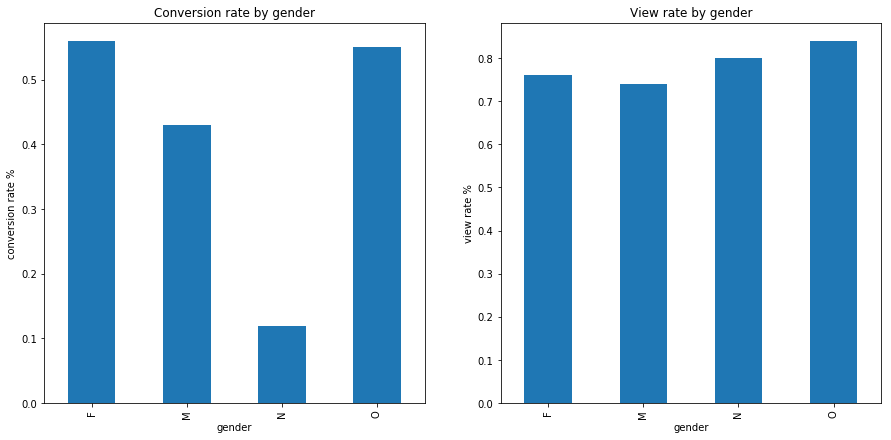

In [287]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

offer_cr['offer_conversion_rate'].plot(kind='bar', title='Conversion rate by gender', ax=axes[0]).set_ylabel('conversion rate %')
offer_cr['offer_view_cr'].plot(kind='bar', title='View rate by gender', ax=axes[1]).set_ylabel('view rate %')

In [179]:
offer_cr_age = df.groupby(['gender', 'age_categories', 'income_binned'])[['total_offers_received', 'total_offers_viewed', 'total_offers_completed']].sum()
offer_cr_age['conversion_rate'] = offer_cr_age.iloc[:]['total_offers_completed'] / offer_cr_age.iloc[:]['total_offers_received']

In [183]:
offer_cr_age

total_offers_received  \
gender age_categories income_binned                          
F      10-19          30k-39k        67                      
                      40k-49k        89                      
                      50k-59k        78                      
                      60k-69k        92                      
                      70k-79k        29                      
       20-29          30k-39k        472                     
                      40k-49k        403                     
                      50k-59k        420                     
                      60k-69k        383                     
                      70k-79k        145                     
       30-39          30k-39k        460                     
                      40k-49k        447                     
                      50k-59k        597                     
                      60k-69k        368                     
                      70k-79k        322                     
                      80k-89k        88                      
                      90k-99k        73                      
       40-49          100k-109k      94                      
                      110k-120k      108                     
                      30k-39k        422                     
                      40k-49k        338                     
                      50k-59k        849                     
                      60k-69k        681                     
                      70k-79k        687                     
                      80k-89k        422                     
                      90k-99k        372                     
       50-59          100k-109k      556                     
                      110k-120k      464                     
                      30k-39k        472                     
                      40k-49k        486                     
...                                  ...                     
O      40-49          70k-79k        32                      
                      80k-89k        15                      
                      90k-99k        25                      
       50-59          30k-39k        22                      
                      40k-49k        13                      
                      50k-59k        51                      
                      60k-69k        35                      
                      70k-79k        53                      
                      80k-89k        59                      
                      90k-99k        36                      
       60-69          30k-39k        32                      
                      40k-49k        22                      
                      50k-59k        34                      
                      60k-69k        23                      
                      70k-79k        22                      
                      80k-89k        8                       
                      90k-99k        11                      
       70-79          40k-49k        10                      
                      50k-59k        44                      
                      60k-69k        27                      
                      70k-79k        4                       
                      80k-89k        15                      
                      90k-99k        3                       
       80-89          40k-49k        8                       
                      50k-59k        15                      
                      60k-69k        8                       
                      70k-79k        5                       
                      80k-89k        9                       
       Missing        80k-89k        3                       
                      90k-99k        4                       

                                     total_offers_viewed  \
gender age_categories income_binned                        
F      10-

In [182]:
offer_cr_age[offer_cr_age.iloc[:]['conversion_rate'] > 0.50]

total_offers_received  \
gender age_categories income_binned                          
F      10-19          70k-79k        29                      
       20-29          40k-49k        403                     
                      50k-59k        420                     
                      60k-69k        383                     
                      70k-79k        145                     
       30-39          50k-59k        597                     
                      60k-69k        368                     
                      70k-79k        322                     
                      80k-89k        88                      
                      90k-99k        73                      
       40-49          100k-109k      94                      
                      110k-120k      108                     
                      50k-59k        849                     
                      60k-69k        681                     
                      70k-79k        687                     
                      80k-89k        422                     
                      90k-99k        372                     
       50-59          100k-109k      556                     
                      110k-120k      464                     
                      40k-49k        486                     
                      50k-59k        981                     
                      60k-69k        752                     
                      70k-79k        1343                    
                      80k-89k        1109                    
                      90k-99k        991                     
       60-69          100k-109k      480                     
                      110k-120k      438                     
                      50k-59k        764                     
                      60k-69k        718                     
                      70k-79k        1148                    
...                                  ...                     
M      80-89          80k-89k        137                     
                      90k-99k        136                     
       Missing        100k-109k      23                      
                      80k-89k        51                      
                      90k-99k        18                      
O      10-19          50k-59k        3                       
       30-39          50k-59k        34                      
                      60k-69k        18                      
                      70k-79k        4                       
       40-49          30k-39k        19                      
                      50k-59k        21                      
                      60k-69k        26                      
                      70k-79k        32                      
                      80k-89k        15                      
                      90k-99k        25                      
       50-59          40k-49k        13                      
                      50k-59k        51                      
                      60k-69k        35                      
                      70k-79k        53                      
       60-69          60k-69k        23                      
                      80k-89k        8                       
                      90k-99k        11                      
       70-79          50k-59k        44                      
                      60k-69k        27                      
                      80k-89k        15                      
                      90k-99k        3                       
       80-89          70k-79k        5                       
                      80k-89k        9                       
       Missing        80k-89k        3                       
                      90k-99k        4                       

                                     total_offers_viewed  \
gender age_categories income_binned                        
F      10-

In [184]:
df.columns

Index(['age', 'became_member_on', 'gender', 'id', 'income',
       'became_member_year', 'age_categories', 'person', 'total_amount',
       'total_transactions', 'total_offers_received', 'total_offers_viewed',
       'total_offers_completed', 'total_offers_bogo', 'total_offers_discount',
       'total_offers_informational', 'converted_bogo', 'converted_discount',
       'converted_informational', 'all_events_count', 'events_avg_time_diff',
       'total_reward_payout', 'total_planned_reward_payout',
       'converted_email_touchpoints', 'converted_mobile_touchpoints',
       'converted_social_touchpoints', 'converted_web_touchpoints',
       'total_average_duration', 'completed_average_duration',
       'total_average_difficulty', 'completed_average_difficulty',
       'income_binned'],
      dtype='object')